In [ ]:
pip install ucimlrepo

In [ ]:
pip install scikit-learn

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]

X.info(10)
y.info(10)

#check nan value
print(X.isnull().sum())
print(y.isnull().sum())

database = pd.concat([X, y], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 699 entries, 0 to 698
Series name: Class
Non-Null Count  Dtype
--------------  -----
699 non-null    int64
dtypes: int64(1)
memory usage: 5.6 KB
Clump_thicknes

In [ ]:
# Drop rows with any missing values
cleanData = database.dropna()

# Separate the cleaned data back into X and y
X = cleanData.drop(columns=[y.name])
y = cleanData[y.name]

print(X.isnull().sum())
print(y.isnull().sum())

print(f'Shape of X: {X.shape}')
print(f'Length of y: {len(y)}')

Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
dtype: int64
0
Shape of X: (683, 9)
Length of y: 683


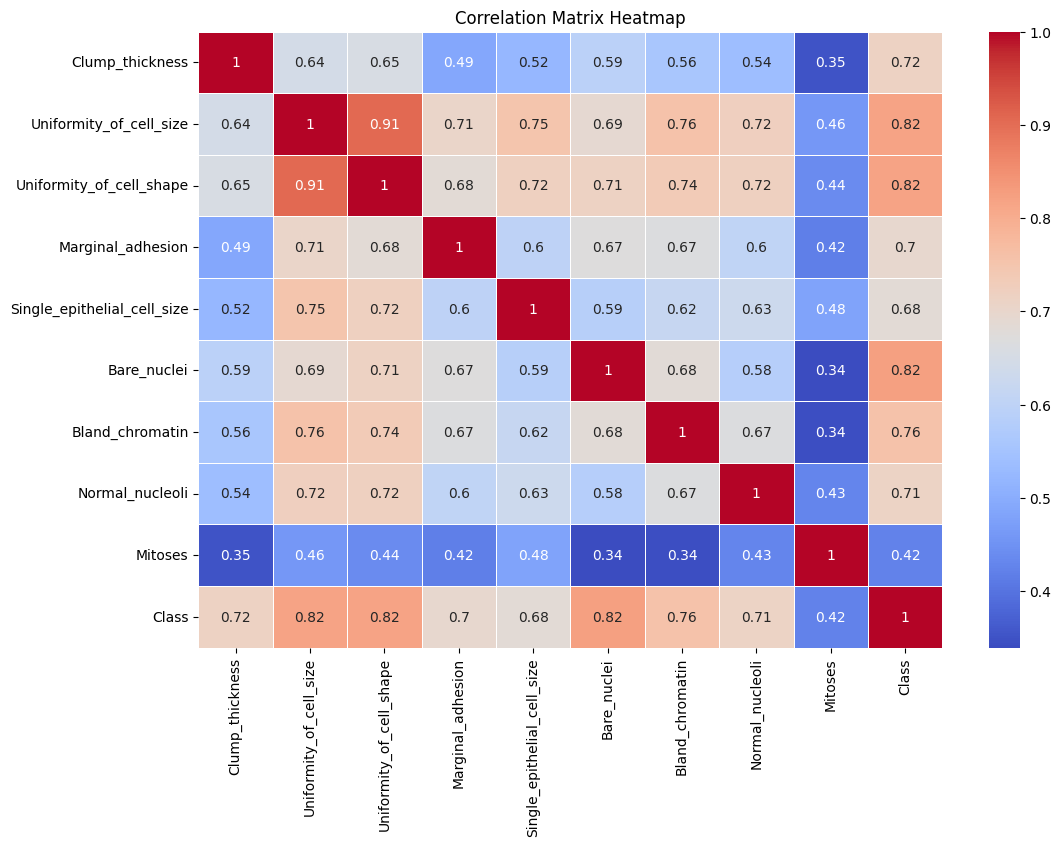

In [ ]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = database.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

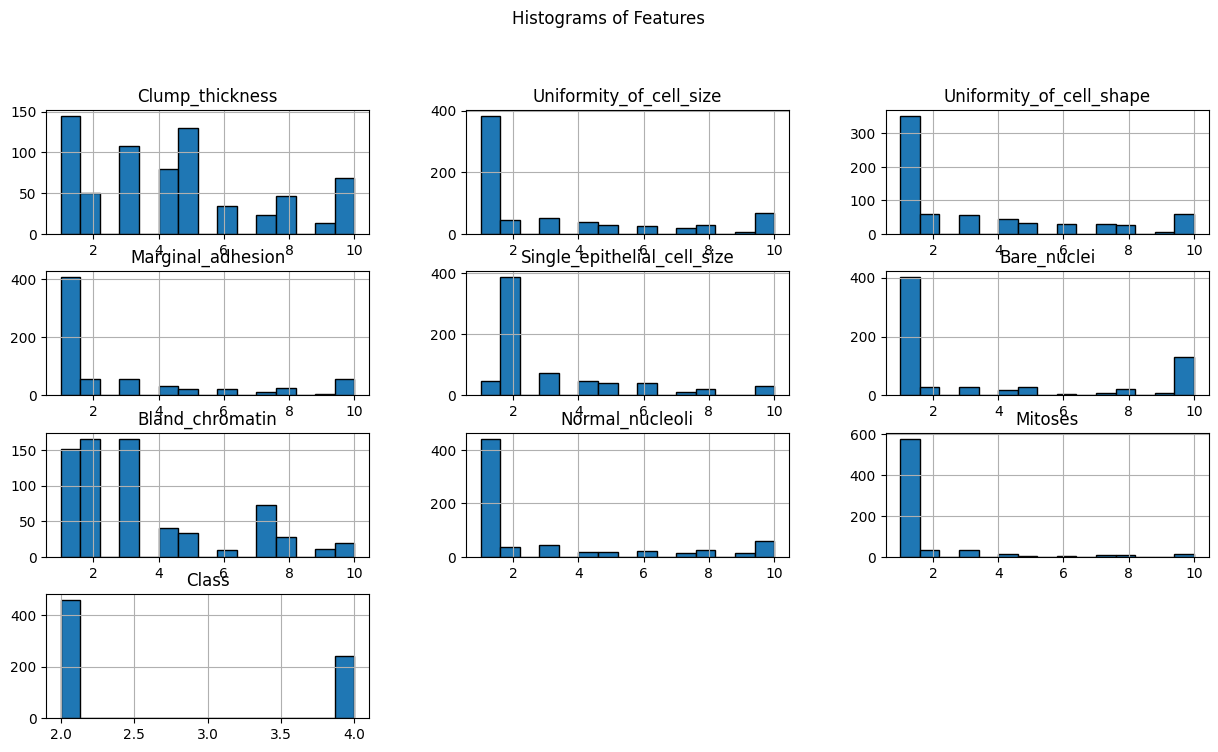

In [ ]:
# Histograms for each feature
database.hist(bins=15, figsize=(15, 10), layout=(5, 3), edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

Confusion Matrix:
[[102   1]
 [  4  64]]
Accuracy: 0.9707602339181286
F1 Score: 0.9706403169007047


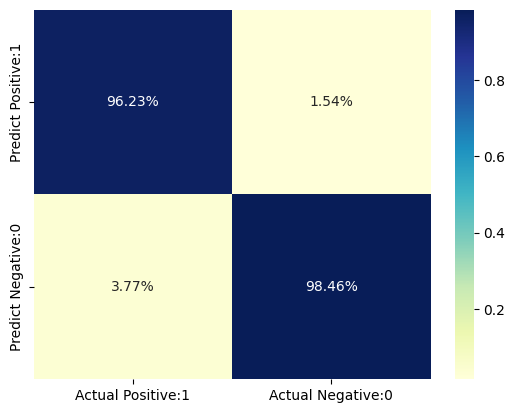

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#transform data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#decision tree
DCclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DCclassifier.fit(X_train, y_train)

#testing
y_pred = DCclassifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

accuracy_score = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Confusion Matrix:\n{cm}')
import seaborn as sns
cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='YlGnBu')
print("Accuracy:", accuracy_score)
print(f'F1 Score: {f1}')

In [ ]:
classification = classification_report(y_test, y_pred)
print(classification)

              precision    recall  f1-score   support

           2       0.96      0.99      0.98       103
           4       0.98      0.94      0.96        68

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred})
output.head()

,Real_class,Predicted_class
304,4,4
149,4,4
217,2,2
120,2,2
314,2,2


[[102   1]
 [  5  63]]
Accuracy: 0.9649122807017544
F1 Score: 0.9647148173463962


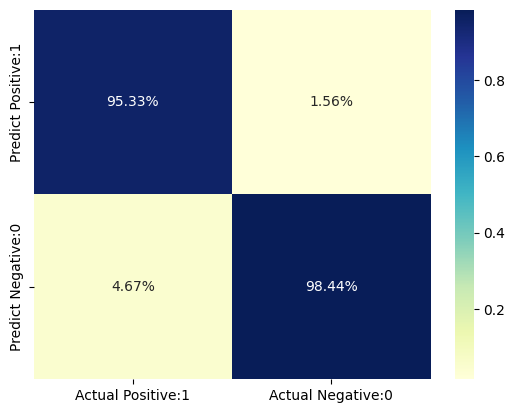

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

RFclassifier = RandomForestClassifier(n_estimators = 10, max_depth = 5 ,criterion = 'entropy', random_state = 0)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

f1 = f1_score(y_test, y_pred, average='weighted')

import seaborn as sns
cm = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='YlGnBu')
print(f'F1 Score: {f1}')